In [1]:
from os import path

import numpy as np
import h5py
from tqdm import tqdm

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from rnn_tauid.common.mpl_setup import mpl_setup
mpl_setup()

from rnn_tauid.evaluation.misc import pearsonr

In [2]:
# Sample paths
features_fname = "/lustre/user/cdeutsch/rnn-feature-samples-v5/track_features_3p.h5"

# Plot output prefix
plot_prefix = "/lustre/user/cdeutsch/rnn-feature-samples-v5/track_feature_correlations_3p/"

In [3]:
features = h5py.File(features_fname, "r")

In [4]:
label = features["label"][...]
weight = features["weight"][...]

In [5]:
def corr(arr):
    L = []
    for i in range(10):
        a = arr[:, i]
        mask = ~np.isnan(a)
        r = pearsonr(a[mask], label[mask], weights=weight[mask])
        L.append(r)
    
    return np.array(L)    

In [6]:
x = np.arange(1, 11)

For taus the leading track should have the majority of the transv. momentum. High momentum tracks aside from the first indicate q/g jets

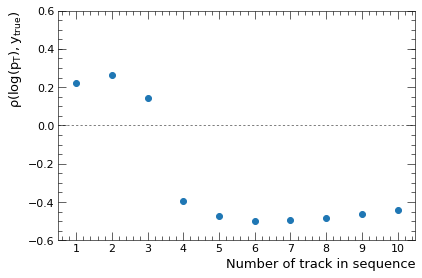

In [21]:
c_pt = corr(features["data/TauTracks.pt_log"])
fig, ax = plt.subplots()
ax.plot(x, c_pt, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.6, 0.6)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho(log(p_\mathrm{T}), y_\mathrm{true})$", ha="right", y=1.0)
fig.tight_layout()
fig.savefig(path.join(plot_prefix, "pt.pdf"))

$p_\mathrm{T}^\mathrm{asym.} = \frac{p_\mathrm{T}^\mathrm{track} - p_\mathrm{T}^\mathrm{JS}}{p_\mathrm{T}^\mathrm{track} + p_\mathrm{T}^\mathrm{JS}}$

Same reason as pt?

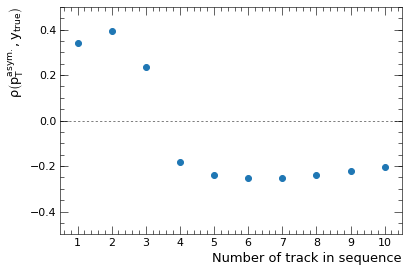

In [8]:
c_pt_asym = corr(features["data/TauTracks.pt_asym"])
fig, ax = plt.subplots()
ax.plot(x, c_pt_asym, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left( p_\mathrm{T}^\mathrm{asym.}, y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "pt_asym.pdf"))

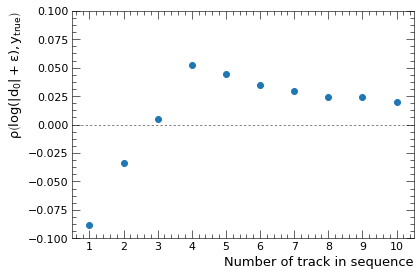

In [22]:
c_d0 = corr(features["data/TauTracks.d0_log"])
fig, ax = plt.subplots()
ax.plot(x, c_d0, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left( \log(|d_0| + \varepsilon), y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "d0.pdf"))

The first track is close to the IP for taus (whats with the decay length?)
Subsequent tracks have large z0sinTheta if they are pileup or conversion tracks -> likely signal

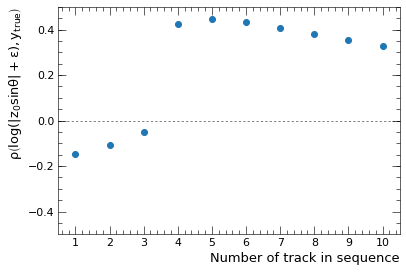

In [23]:
c_z0 = corr(features["data/TauTracks.z0sinThetaTJVA_log"])
fig, ax = plt.subplots()
ax.plot(x, c_z0, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left( \log(|z_0 \sin\theta| + \varepsilon), y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "z0.pdf"))

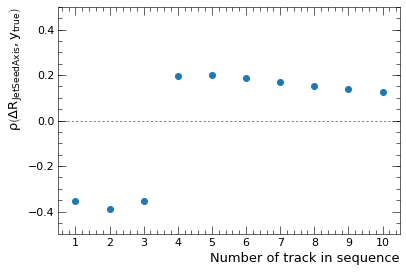

In [24]:
c_dR= corr(features["data/TauTracks.dRJetSeedAxis"])
fig, ax = plt.subplots()
ax.plot(x, c_dR, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left(\Delta R_\mathrm{JetSeedAxis}, y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "dR.pdf"))

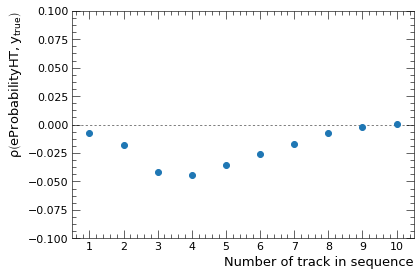

In [12]:
c_eProb= corr(features["data/TauTracks.eProbabilityHT"])
fig, ax = plt.subplots()
ax.plot(x, c_eProb, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left(eProbabilityHT, y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "eProbabilityHT.pdf"))

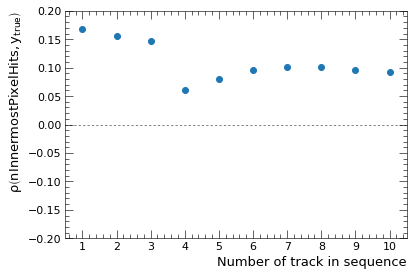

In [30]:
c_innerPix = corr(features["data/TauTracks.nInnermostPixelHits"])
fig, ax = plt.subplots()
ax.plot(x, c_innerPix, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.2, 0.2)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left(nInnermostPixelHits, y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "nInnermostPixelHits.pdf"))

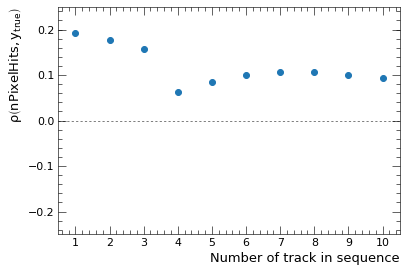

In [27]:
c_pix = corr(features["data/TauTracks.nPixelHits"])
fig, ax = plt.subplots()
ax.plot(x, c_pix, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left(nPixelHits, y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "nPixelHits.pdf"))

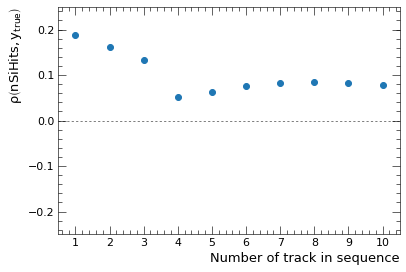

In [29]:
c_si = corr(features["data/TauTracks.nSiHits"])
fig, ax = plt.subplots()
ax.plot(x, c_si, "o")
ax.axhline(0.0, linestyle=":", linewidth=1.0, color="grey", zorder=0)
ax.set_xlim(0.5, 10.5)
ax.set_xticks(x)
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel("Number of track in sequence", ha="right", x=1.0)
ax.set_ylabel(r"$\rho\left(nSiHits, y_\mathrm{true}\right)$", ha="right", y=1.0)
fig.savefig(path.join(plot_prefix, "nSiHits.pdf"))

In [16]:
vn = ["pt_log", "pt_asym", "d0_log",
      "z0sinThetaTJVA_log",
      "dRJetSeedAxis",
      "eProbabilityHT", "nInnermostPixelHits",
      "nPixelHits","nSiHits"]

names = [r"$\log_{10}\left( p_\mathrm{T} \right)$",
         r"$p_\mathrm{T}^\mathrm{asym.}$",
         r"$\log_{10}\left( |d_0| + \varepsilon \right)$",
         r"$\log_{10}\left( |z_0 \sin\theta| + \varepsilon \right)$",
         r"$\Delta R_\mathrm{JetSeedAxis}$",
         r"eProbabilityHT",
         r"nInnermostPixelHits",
         r"nPixelHits",
         r"nSiHits"]

sd = dict()
for i, v in enumerate(vn):
    sd[i] = features["data/TauTracks.{}".format(v)][:, 0]

mat = np.eye(9)

In [17]:
from itertools import product

In [18]:
evals = [(i, j) for i,j in product(range(9), range(9)) if i > j]

In [19]:
for i, j in evals:
    mask = ~np.isnan(sd[i])
    mat[i,j] = pearsonr(sd[i][mask], sd[j][mask], weights=weight[mask])

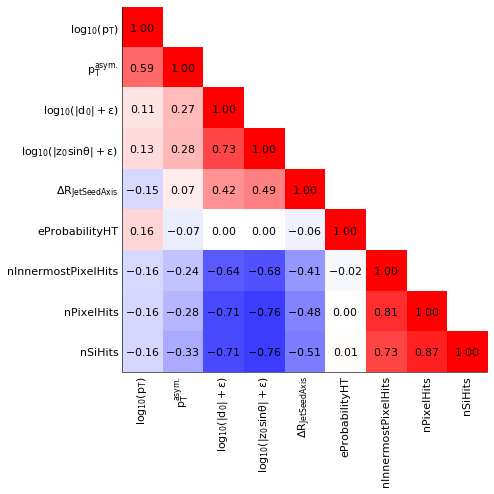

In [20]:
mask = ~np.tri(9, dtype=np.bool)
ma_mat = np.ma.array(mat, mask=mask)

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(ma_mat, cmap="bwr", vmin=-1, vmax=1)

ax.set_xticks(np.arange(9))
ax.set_xticklabels(names, rotation="vertical")

ax.set_yticks(np.arange(9))
ax.set_yticklabels(names)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.minorticks_off()
ax.tick_params(which="both", top="off", bottom="off", right="off", left="off")
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

for i,j in product(range(9), range(9)):
    if i >= j:
        ax.text(j, i, "${:.2f}$".format(np.round(mat[i,j], decimals=2)+0), ha="center", va="center")

fig.tight_layout()
fig.savefig(path.join(plot_prefix, "corrmat.pdf"))

In [10]:
features.close()